In [1]:
import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')
import warnings
warnings.filterwarnings('ignore')

from obstacle_avoidance_processing import AvoidanceProcessing


Loading DLC 2.2.3...


In [2]:
# metadata json path
metadata_path = r'C:\Users\nlab\obstacle_avoidance\metadata\oa_metadata.json'

#C:\Users\nlab\Desktop\mike_bonsai\recordings\metadata
# task name
# 'oa' for object avoidance
# 'gd' for gap detection
task_name = 'oa'

In [3]:
session = AvoidanceProcessing(metadata_path, task=task_name) 

In [4]:
session.change_dlc_project(r'C:\Users\nlab\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\config.yaml')
session.dlc_project

'C:\\Users\\nlab\\obstacle_avoidance\\deeplabcut\\obstacle_avoidance_100522-mike-2022-10-05\\config.yaml'

In [5]:
session.preprocess()

using light network
Using snapshot-750000 for model C:\Users\nlab\obstacle_avoidance\deeplabcut\obstacle_avoidance_100522-mike-2022-10-05\dlc-models\iteration-0\object_avoidanceoct22-trainset95shuffle1
Starting to analyze %  C:/Users/nlab/obstacle_avoidance/recordings\100322\J19LT\oa\100322_J19LT_control_Rig2_oa_top1.avi
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


100%|██████████| 33075/33075 [00:30<00:00, 1078.58it/s]


In [5]:
session.process()


0it [00:00, ?it/s]

42
df made
C:/Users/nlab/obstacle_avoidance/recordings\100322\J19LT\oa\100322_J19LT_control_Rig2_oa_top1.avi


100%|██████████| 33075/33075 [00:46<00:00, 708.62it/s]


saved_frames
saving100322_J19LT_control_Rig2_oaraw


1it [00:52, 52.83s/it]

saving100322_J19LT_control_Rig2_oa processed


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df= pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\100322\J19LT\oa\processed_J19LT_100322_oa.h5')

In [12]:
df.head()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,obstacleTR_x_cm_lind,obstacleTR_y_cm_lind,obstacleBR_x_cm_lind,obstacleBR_y_cm_lind,obstacleBL_x_cm_lind,obstacleBL_y_cm_lind,obstacle_x_lind,obstacle_x_cm_lind,obstacle_y_lind,obstacle_y_cm_lind
1,63229.835737,63233.886988,"[63229.841587, 63229.857971, 63229.874572, 632...","[[1915, 1916, 1917, 1918, 1919, 1920, 1921, 19...","[569.733154296875, 569.970703125, 569.74591064...","[257.3892822265625, 257.12530517578125, 257.15...","[557.7861328125, 558.2794189453125, 558.036621...","[244.46926879882812, 244.72145080566406, 244.5...","[548.0977783203125, 548.9324951171875, 548.731...","[252.24192810058594, 252.86441040039062, 252.7...",...,31.463939,44.081228,29.339857,37.248145,24.428268,37.274052,257.011169,27.433360,330.538605,35.281675
2,63233.886988,63238.323264,"[63233.89248, 63233.909158, 63233.926592, 6323...","[2158, 2159, 2160, 2161, 2162, 2163, 2164, 216...","[113.53089904785156, 113.13566589355469, 113.7...","[265.6458435058594, 265.5018310546875, 265.546...","[132.0079345703125, 131.69308471679688, 131.93...","[265.60205078125, 265.60333251953125, 265.0898...","[127.6922836303711, 127.65089416503906, 127.22...","[251.41238403320312, 250.97344970703125, 251.0...",...,28.994327,22.531179,29.326443,37.279905,24.457417,37.302228,251.283417,26.821980,280.317204,29.921045
3,63238.323264,63246.286553,"[63238.327385, 63238.345292, 63238.36064, 6323...","[[2424, 2425, 2426, 2427, 2428, 2429, 2430, 24...","[571.6720581054688, 572.830810546875, 572.9562...","[258.0514831542969, 258.0072937011719, 258.028...","[550.4642333984375, 551.2725830078125, 551.811...","[257.36553955078125, 257.2220458984375, 257.58...","[557.8547973632812, 558.7261962890625, 559.481...","[267.9643859863281, 267.63043212890625, 268.60...",...,36.714204,24.424407,37.446869,39.046958,32.660233,39.164317,313.435879,33.456130,344.133717,36.732816
4,63246.286553,63253.692748,"[63246.297254, 63246.313676, 63246.330137, 632...","[2902, 2903, 2904, 2905, 2906, 2907, 2908, 290...","[112.93521881103516, 112.67398834228516, 112.6...","[268.1513977050781, 267.9513244628906, 267.830...","[131.3789520263672, 130.97537231445312, 130.83...","[266.6938171386719, 266.421875, 266.3495178222...","[127.57090759277344, 127.2509536743164, 127.27...","[253.28330993652344, 252.99685668945312, 252.2...",...,36.718921,24.420818,37.464358,39.065780,32.659011,39.190888,313.494228,33.462359,344.243671,36.744553
5,63253.692748,63258.067686,"[63253.699276, 63253.716531, 63253.73271, 6325...","[[3346, 3347, 3348, 3349, 3350, 3351, 3352, 33...","[567.7761840820312, 567.9352416992188, 567.834...","[260.19580078125, 259.65631103515625, 259.8600...","[555.2067260742188, 554.922119140625, 552.5525...","[248.92391967773438, 249.0541534423828, 250.78...","[554.1431274414062, 554.2879028320312, 555.561...","[248.69058227539062, 248.7856903076172, 247.25...",...,25.470267,12.858294,26.265833,27.516337,21.554206,27.611744,220.704636,23.558002,189.646877,20.242898


In [6]:
df = pd.read_hdf(r'C:\Users\nlab\obstacle_avoidance\recordings\100322\J19LT\oa\raw_J19LT_100322_oa.h5')  
df['odd'] = np.nan
for i, ind in enumerate(df.index.values):
    if ind%2 == 0: # odd values
        df.at[ind, 'odd'] = True
    elif ind%2 == 1:
        df.at[ind, 'odd'] = False

dist_to_posts = np.median(df['arenaTR_x'].iloc[0],0) - np.median(df['arenaTL_x'].iloc[0],0)
pxl2cm= dist_to_posts/48.26
x_cols = [i for i in df.columns.values if '_x' in i]
y_cols = [i for i in df.columns.values if '_y' in i]
for i in range(len(x_cols)):
    df[x_cols[i]+'_cm'] = df.loc[:,x_cols[i]] / pxl2cm
    df[y_cols[i]+'_cm'] = df.loc[:,y_cols[i]] / pxl2cm

In [7]:
## take last index of obstacle and median of arena points
arena_cols = [col for col in df.columns if 'arena' in col]
arena_cols =[col for col in arena_cols if 'likelihood' not in col]
for col in arena_cols:
    for ind,row in df.iterrows():
        df.at[ind,col] = np.nanmedian(row[col])
        


obstacle_cols = [col for col in df.columns if 'obstacle' in col]
obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]
obstacle_cols = [col for col in obstacle_cols if 'std' not in col]
for col in obstacle_cols:
    for ind,row in df.iterrows():
        df.at[ind,col+'_lind'] = row[col][np.isfinite(row[col].astype(float))][-1]
       


In [8]:
## obstacle center based on last index 
index = '_lind'
for ind, row in df.iterrows():
    xvals = np.stack([row['obstacleTL_x'+ index], row['obstacleTR_x'+ index], row['obstacleBL_x'+ index], row['obstacleBR_x'+ index]]).astype(float)
    xvals_cm = np.stack([row['obstacleTL_x_cm'+ index], row['obstacleTR_x_cm'+ index], row['obstacleBL_x_cm'+ index], row['obstacleBR_x_cm'+ index]]).astype(float)
    df.at[ind,'obstacle_x'+ index] = np.nanmean(xvals)
    df.at[ind,'obstacle_x_cm'+ index] = np.nanmean(xvals_cm) 
    
    yvals = np.stack([row['obstacleTL_y'+ index], row['obstacleTR_y'+ index], row['obstacleBL_y'+ index], row['obstacleBR_y'+ index]]).astype(float)
    yvals_cm = np.stack([row['obstacleTL_y_cm'+ index], row['obstacleTR_y_cm'+ index], row['obstacleBL_y_cm'+ index], row['obstacleBR_y_cm'+ index]]).astype(float)
    df.at[ind,'obstacle_y'+ index] = np.nanmean(yvals)
    df.at[ind,'obstacle_y_cm'+ index] = np.nanmean(yvals_cm)


In [14]:
import seaborn as sns

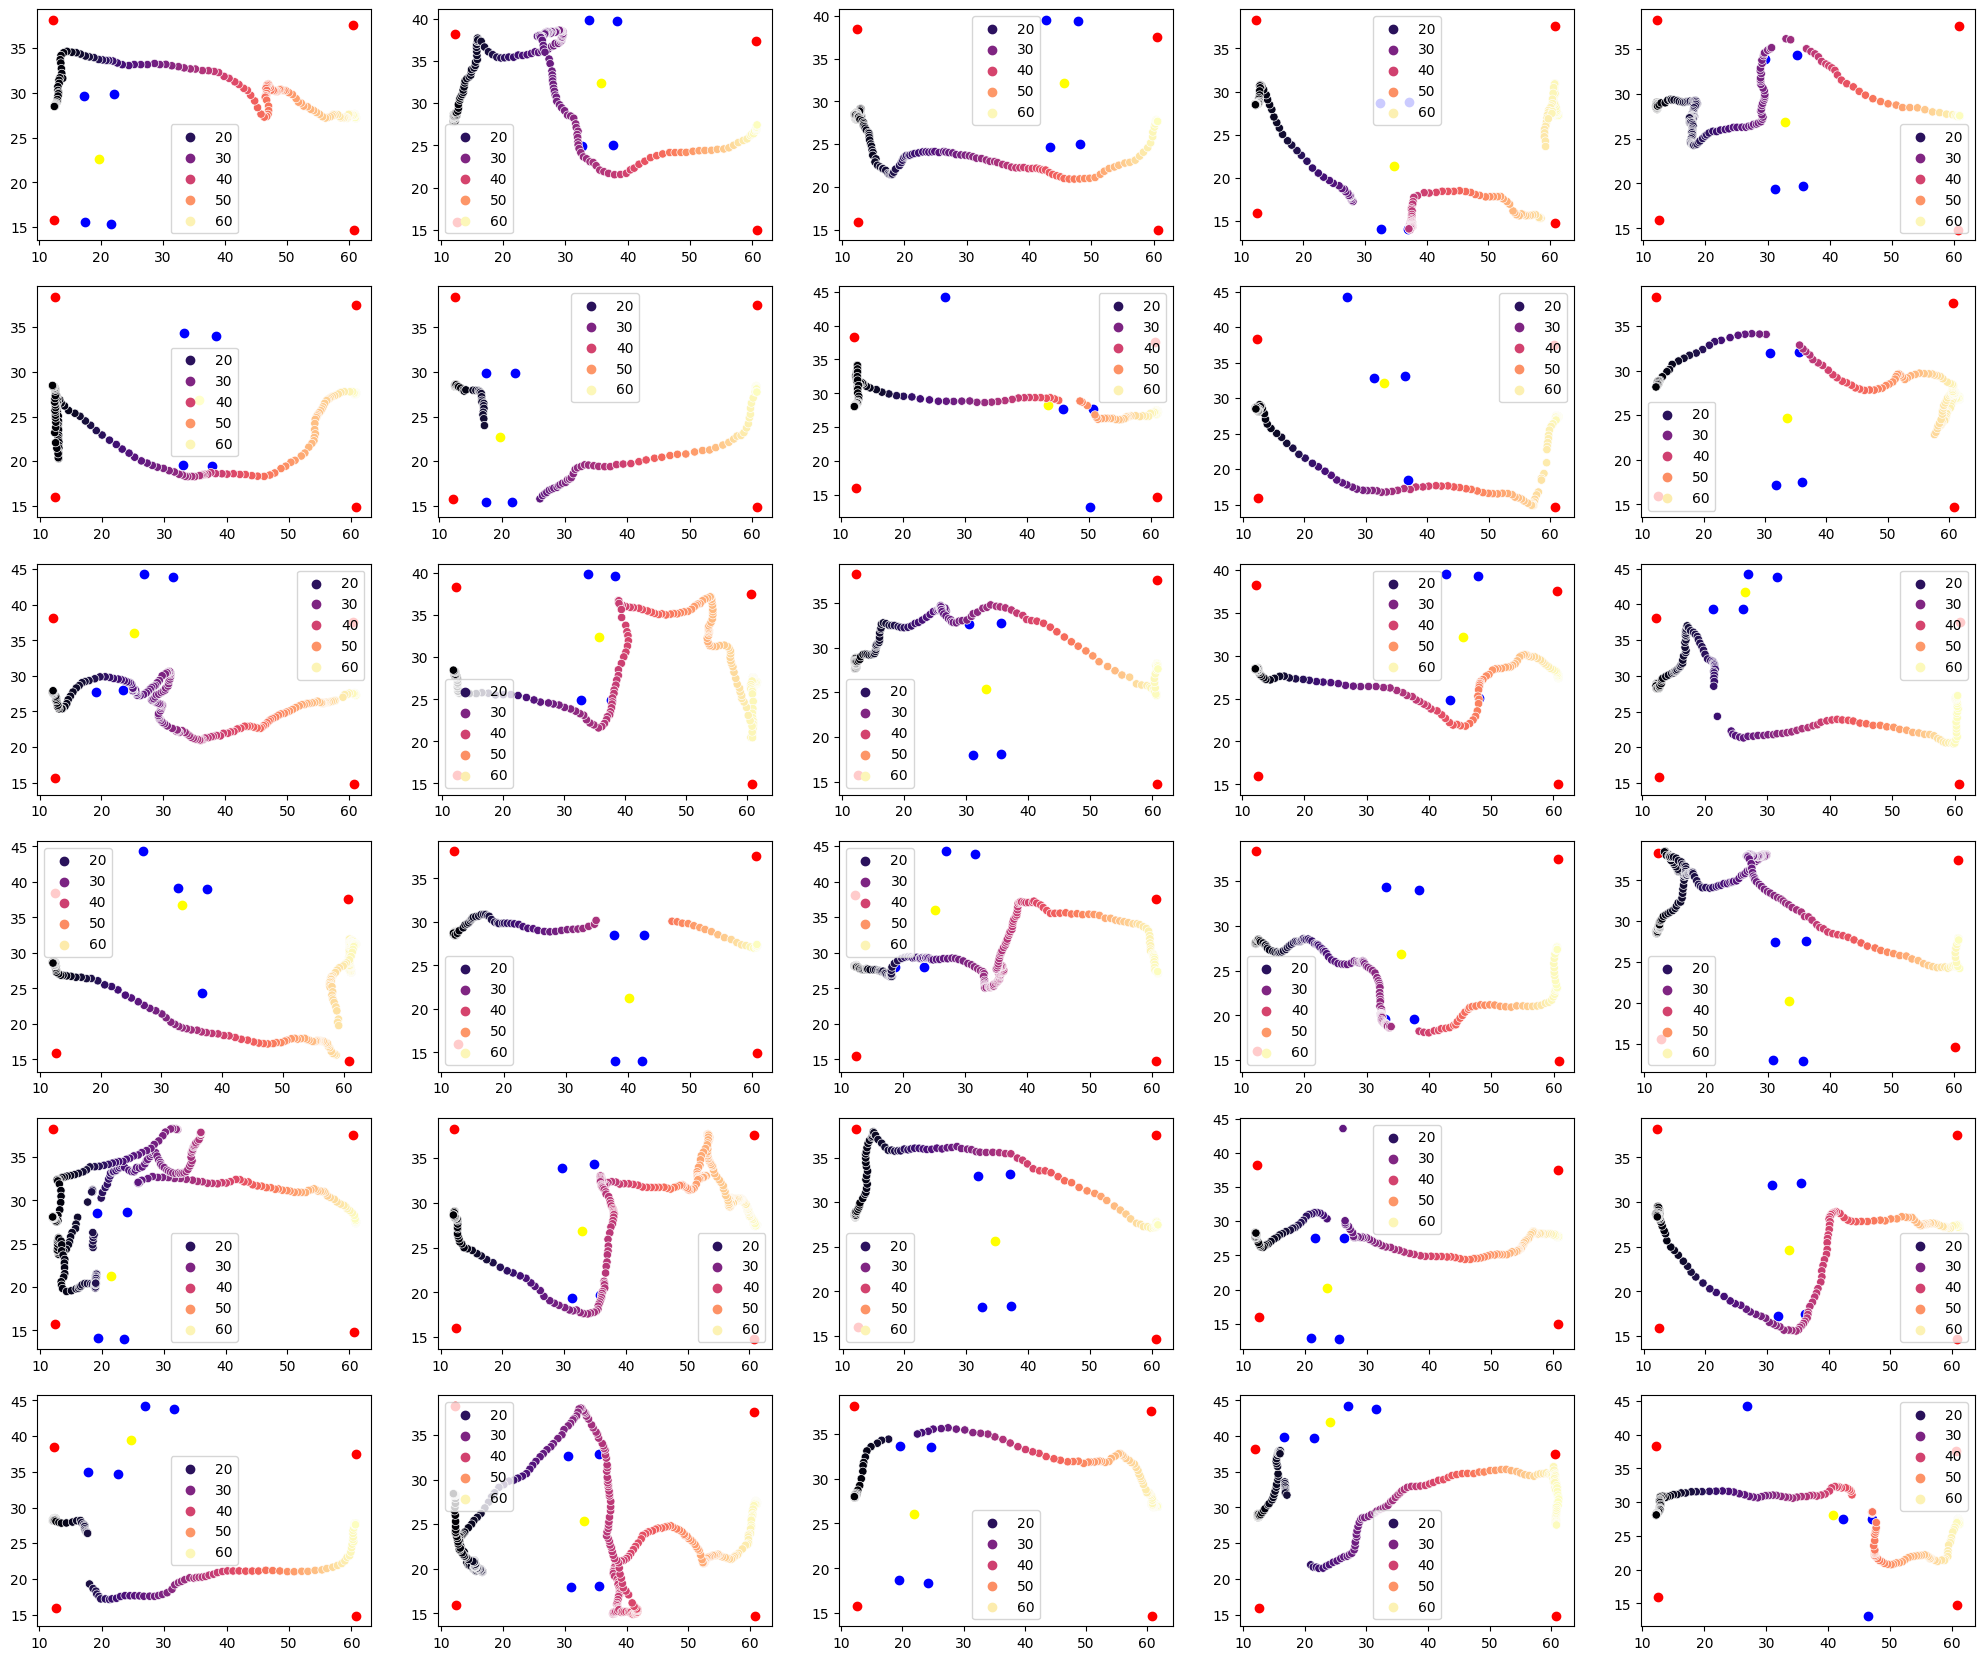

In [17]:
#test=test.reset_index()
test = df.sample(30)
test = test.reset_index()
plt.subplots(6,5, figsize=(25,21)) 
for ind, row in test.iterrows():
    plt.subplot(6,5,ind +1)
    plt.scatter([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBL_x_cm'], row['arenaBR_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBL_y_cm'], row['arenaBR_y_cm']],color='red')

    plt.scatter([row['obstacleTL_x_cm_lind'], row['obstacleTR_x_cm_lind'], row['obstacleBL_x_cm_lind'], row['obstacleBR_x_cm_lind']],
                [row['obstacleTL_y_cm_lind'], row['obstacleTR_y_cm_lind'], row['obstacleBL_y_cm_lind'], row['obstacleBR_y_cm_lind']],color='blue')
    plt.scatter(row['obstacle_x_cm_lind'],row['obstacle_y_cm_lind'],color='yellow')

   
    sns.scatterplot(x=row['nose_x_cm'],y=row['nose_y_cm'],hue = row['nose_x_cm'], palette ='magma')            
                

In [62]:
test[[]]

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,rightportT_x_cm,rightportT_y_cm,rightportB_x_cm,rightportB_y_cm,obstacle_x,obstacle_x_cm,obstacle_x_std,obstacle_y,obstacle_y_cm,obstacle_y_std
0,52,63505.011712,63520.524620,"[63505.019686, 63505.036108, 63505.052774, 635...","[18420, 18421, 18422, 18423, 18424, 18425, 184...","[114.86739349365234, 115.15232849121094, 114.5...","[265.1737365722656, 264.5727233886719, 265.327...","[132.2296142578125, 132.04318237304688, 131.56...","[264.931640625, 264.8052673339844, 265.3870849...","[128.26657104492188, 128.45938110351562, 128.0...",...,"[61.69410873321727, 61.6417876547938, 61.71201...","[26.654649612824908, 26.665233050989386, 26.71...","[60.63674215021022, 60.69263338813762, 60.5604...","[26.534703980294143, 26.601559777427962, 26.63...",34.300393,34.300393,0.764463,37.063611,37.063611,2.159554
1,55,63537.848000,63544.279436,"[63537.864243, 63537.881459, 63537.897433, 635...","[[20390, 20391, 20392, 20393, 20394, 20395, 20...","[570.2232055664062, 569.9671630859375, 570.802...","[258.0972900390625, 258.2244873046875, 258.113...","[557.015869140625, 556.9907836914062, 557.0140...","[246.8000030517578, 247.10902404785156, 247.17...","[550.3031005859375, 550.3987426757812, 550.884...",...,"[61.67984112498076, 61.64324699006548, 61.6718...","[26.79452755010435, 26.78338546015618, 26.7576...","[60.63146508962959, 60.63878782554641, 60.7036...","[26.78355973345313, 26.765006956578464, 26.763...",30.349744,30.349744,4.873094,28.155580,28.155580,5.008681
2,1,63229.835737,63233.886988,"[63229.841587, 63229.857971, 63229.874572, 632...","[[1915, 1916, 1917, 1918, 1919, 1920, 1921, 19...","[569.733154296875, 569.970703125, 569.74591064...","[257.3892822265625, 257.12530517578125, 257.15...","[557.7861328125, 558.2794189453125, 558.036621...","[244.46926879882812, 244.72145080566406, 244.5...","[548.0977783203125, 548.9324951171875, 548.731...",...,"[61.73429257230531, 61.69051902904452, 61.6911...","[26.76478219288707, 26.726091892241147, 26.711...","[60.578727058271355, 60.6297712183321, 60.5898...","[26.75554570814857, 26.709415403572923, 26.709...",30.779012,30.779012,4.425388,29.719773,29.719773,6.136085
3,65,63595.254105,63603.069977,"[63595.267737, 63595.283814, 63595.300723, 635...","[[23833, 23834, 23835, 23836, 23837, 23838, 23...","[569.0010375976562, 569.2662963867188, 569.599...","[259.0525207519531, 259.1631774902344, 259.335...","[558.9092407226562, 558.7410888671875, 558.640...","[246.99937438964844, 247.15557861328125, 247.6...","[550.5185546875, 550.381591796875, 550.6304931...",...,"[61.64352061542892, 61.65834850417152, 61.6454...","[26.755498475198927, 26.758804781673827, 26.77...","[60.60429148508417, 60.5860823686362, 60.64927...","[26.74869204428336, 26.799293191850925, 26.811...",33.086297,33.086297,0.584331,25.102378,25.102378,4.075984
4,5,63253.692748,63258.067686,"[63253.699276, 63253.716531, 63253.73271, 6325...","[[3346, 3347, 3348, 3349, 3350, 3351, 3352, 33...","[567.7761840820312, 567.9352416992188, 567.834...","[260.19580078125, 259.65631103515625, 259.8600...","[555.2067260742188, 554.922119140625, 552.5525...","[248.92391967773438, 249.0541534423828, 250.78...","[554.1431274414062, 554.2879028320312, 555.561...",...,"[61.678440423715536, 61.6587850017751, 61.6080...","[26.857150297716853, 26.823502521625752, 26.78...","[60.30430036340994, 60.27462504125593, 60.2010...","[26.893094572393967, 26.833173875245432, 26.81...",29.960343,29.960343,4.697552,30.066873,30.066873,8.439652


In [20]:
session.positions

AttributeError: 'AvoidanceProcessing' object has no attribute 'positions'